# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Hilman Fauzan
- **Email:** hilmanfauzan462@gmail.com
- **ID Dicoding:** hilmanfauzan

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penyebaran penyewaan sepeda setiap bulannya dan setiap musimnya? Musim mana yang paling banyak dan sedikit jumlah penyewaan?
- Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?
- Kapan jam sibuk penyewaan sepeda dalam sehari?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

Memuat tabel Day

In [2]:
from google.colab import drive
drive.mount('/content/drive')
file_path = "/content/drive/My Drive/Bike-sharing-dataset/day.csv"
df_day = pd.read_csv(file_path)
df_day.head()

Mounted at /content/drive


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Memuat Tabel Hour

In [3]:
file_path = "/content/drive/My Drive/Bike-sharing-dataset/hour.csv"
df_hour = pd.read_csv(file_path)
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Kode diatas menampilkan 5 data teratas dari dataframe df_day
- Kode diatas menampilkan 5 data teratas dari dataframe df_hour

### Assessing Data

Menilai Data df_day

In [4]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [5]:
print("Jumlah duplikasi: ",df_day.duplicated().sum())
df_day.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai Data df_hour

In [6]:
df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [7]:
print("Jumlah duplikasi: ", df_hour.duplicated().sum())
df_hour.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Kode df_day.info() dan df_hour.info() sama-sama menunjukkan terdapat masalah pada tipe data yaitu dteday yang isinya tanggal harusnya dituliskan sebagai datetime, jumlah data setiap kolom juga sudah sama, tidak ada data yang missing.
- Dalam hasil tersebut, tidak terdapat keanehan dan tidak ada duplikasi pada data df_day dan df_hour.

### Cleaning Data

Membersihkan Data df_day karena terdapat kesalahan dalam kolom dteday

In [8]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df_day[column] = pd.to_datetime(df_day[column])

df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

Membersihkan data df_hour

In [9]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  df_hour[column] = pd.to_datetime(df_hour[column])

df_hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Pembersihan data df_day sudah dilakukan, sehingga semua tipe data pada dataset tersebut sudah sesuai dan tidak ada yang salah.
- Pembersihan data df_hour sudah dilakukan, sehingga semua tipe data pada dataset tersebut sudah sesuai dan tidak ada yang salah.

## Exploratory Data Analysis (EDA)

### Explore Data df_day

In [10]:
df_day.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [11]:
#Mapping angka ke nama musim agar lebih jelas
season_mapping = {
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

df_day.groupby(by="season").cnt.sum().sort_values(ascending=False)

,cnt
season,
3,1061129
2,918589
4,841613
1,471348


In [12]:
# Agregasi jumlah penyewaan per bulan
monthly_rentals = df_day.groupby("mnth")["cnt"].sum().reset_index()

# Mapping angka bulan ke nama bulan agar tampilan menjadi lebih jelas
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
monthly_rentals["month"] = monthly_rentals["mnth"].map(month_mapping)

# Mengurutkan bulan sesuai urutan dari Januari sampai Desember
monthly_rentals = monthly_rentals.sort_values("mnth")

print(monthly_rentals[["month", "cnt"]])

   month     cnt
0    Jan  134933
1    Feb  151352
2    Mar  228920
3    Apr  269094
4    May  331686
5    Jun  346342
6    Jul  344948
7    Aug  351194
8    Sep  345991
9    Oct  322352
10   Nov  254831
11   Dec  211036


# Eksplorasi Data df_hour

In [13]:
df_hour.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


In [14]:
df_hour.groupby(by="weathersit").cnt.sum().sort_values(ascending=False)

,cnt
weathersit,
1,2338173
2,795952
3,158331
4,223


In [15]:
df_hour.groupby(by="temp").cnt.sum().sort_values(ascending=False)

,cnt
temp,
0.70,177298
0.72,163449
0.74,161587
0.66,156204
0.64,154985
0.60,149905
0.62,148185
0.76,135660
0.56,123756


In [16]:
# Kelompokkan berdasarkan jam dan hitung total penyewaan
busiest_hours = df_hour.groupby("hr")["cnt"].sum().reset_index()

# Urutkan berdasarkan jumlah penyewaan (descending)
busiest_hours = busiest_hours.sort_values(by="cnt", ascending=False)

# Tampilkan tabel 10 jam paling sibuk
print("10 Jam dengan Penyewaan Tertinggi:")
print(busiest_hours.head(10).to_string(index=False))


10 Jam dengan Penyewaan Tertinggi:
 hr    cnt
 17 336860
 18 309772
  8 261001
 16 227748
 19 226789
 13 184919
 12 184414
 15 183149
 14 175652
 20 164550


**Insight:**
- Insight eksplorasi data df_day
  1. Pada hasil df_day describe bisa diketahui bahwa ada 731 data yang ada pada dataset tersebut.
  2. Pada hasil eksplorasi df_day berdasarkan musim, pelanggan paling banyak pada musim gugur dan sedikit pada musim semi.
  3. Pada hasil eksplorasi df_day berdasarkan tren bulan, pelanggan paling banyak ada pada bulan Agustus.

- Insight eksplorasi data df_hour
  1. Pada eksplorasi data df_hour, diketahui terdapat 17379 data yang terhitung.
  2. Pada hasil eksplorasi df_hour berdasarkan kondisi cuaca, pelanggan paling banyak pada kondisi cuaca kategori 1.
  3. Pada hasil eksplorasi df_hour berdasarkan temperature, paling banyak pada kondisi Udara bersuhu 0.7 berdasarkan data yang sudah dinormalisasikan, atau setara 28 derajat Celcius.
  4. Pada hasil eksplorasi df_hour berdasarkan jam, jam paling teratas dengan pelanggan terbanyak yaitu jam 17 dengan 336860 pelanggan.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyebaran penyewaan sepeda setiap bulannya dan setiap musimnya? Musim mana yang paling banyak dan sedikit jumlah penyewaan?

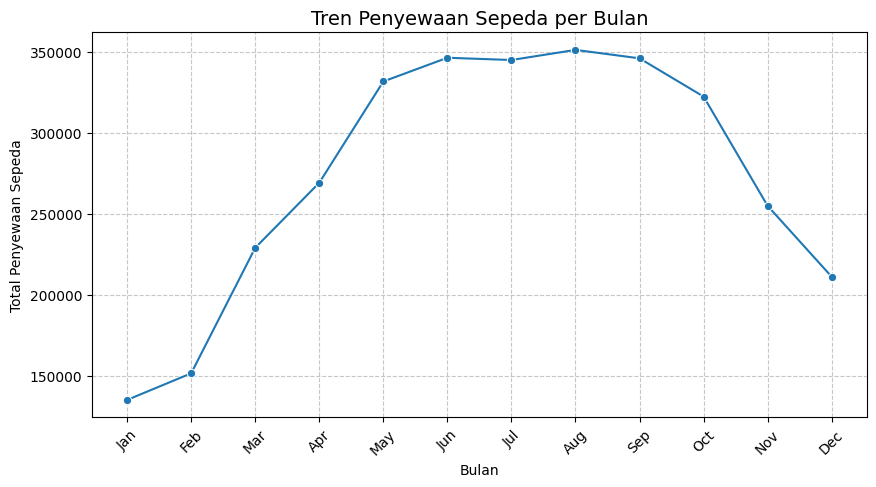

In [17]:
# Agregasi jumlah penyewaan per bulan
monthly_rentals = df_day.groupby("mnth")["cnt"].sum().reset_index()

# Mapping angka bulan ke nama bulan agar tampilan menjadi lebih jelas
month_mapping = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
monthly_rentals["month"] = monthly_rentals["mnth"].map(month_mapping)

# Mengurutkan bulan sesuai urutan dari Januari sampai Desember
monthly_rentals = monthly_rentals.sort_values("mnth")

plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_rentals, x="month", y="cnt", marker="o", linestyle="-")
plt.title("Tren Penyewaan Sepeda per Bulan", fontsize=14)
plt.xlabel("Bulan")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()


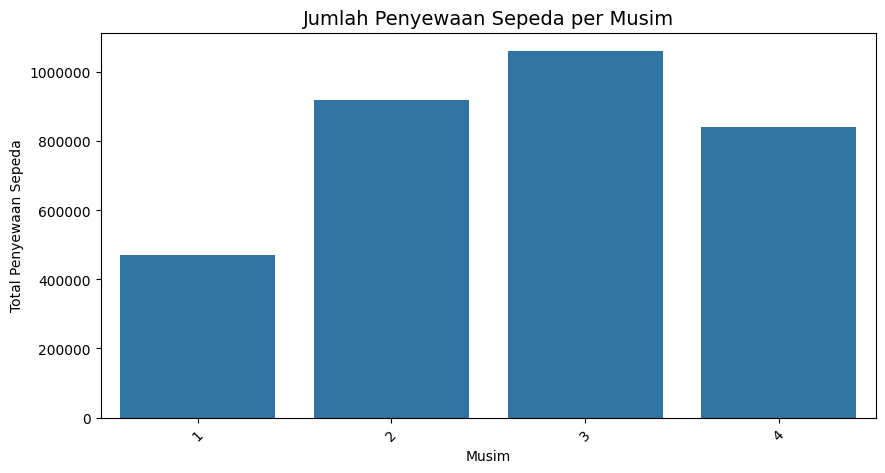

In [18]:
# Agregasi jumlah penyewaan per bulan
season_rentals = df_day.groupby("season")["cnt"].sum().reset_index()

# Mapping angka ke nama musim agar tampilan menjadi lebih jelas
season_mapping = {
    1: "Springer",
    2: "Summer",
    3: "Fall",
    4: "Winter"
}

season_rentals["season_name"] = season_rentals["season"].map(season_mapping)

plt.figure(figsize=(10, 5))
sns.barplot(data=season_rentals, x="season", y="cnt")
plt.title("Jumlah Penyewaan Sepeda per Musim", fontsize=14)
plt.xlabel("Musim")
plt.ylabel("Total Penyewaan Sepeda")
plt.xticks(rotation=45)
plt.ticklabel_format(style="plain", axis="y")
plt.show()

### Pertanyaan 2: Bagaimana kondisi cuaca mempengaruhi jumlah penyewaan sepeda?

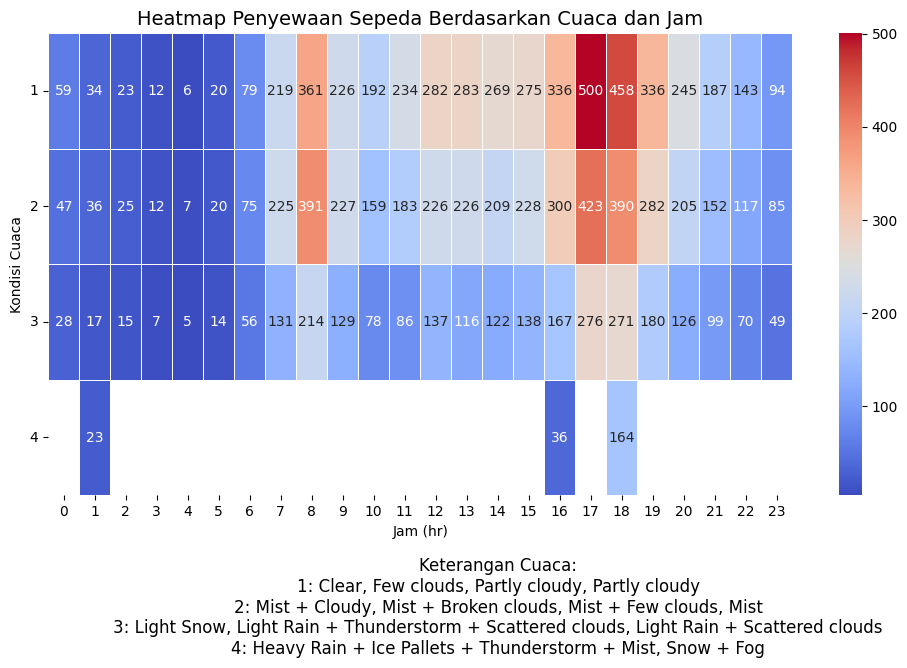

In [19]:
# Definisi keterangan cuaca
weather_labels = {
    1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
    2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
    3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
    4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"
}

# Pivot table untuk heatmap
weather_pivot = df_hour.pivot_table(values="cnt", index="weathersit", columns="hr", aggfunc="mean")

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(weather_pivot, cmap="coolwarm", annot=True, fmt=".0f", linewidths=0.5)

# Tambahkan judul dan label
plt.title("Heatmap Penyewaan Sepeda Berdasarkan Cuaca dan Jam", fontsize=14)
plt.xlabel("Jam (hr)")
plt.ylabel("Kondisi Cuaca")
plt.xticks(rotation=0)  # Pastikan label jam horizontal
plt.yticks(rotation=0)  # Pastikan label sumbu Y tidak miring

# Tambahkan legenda di bawah heatmap
weather_legend = "\n".join([f"{key}: {desc}" for key, desc in weather_labels.items()])
plt.figtext(0.5, -0.15, f"Keterangan Cuaca:\n{weather_legend}", wrap=True, ha="center", fontsize=12)

plt.show()


### Pertanyaan 3 :

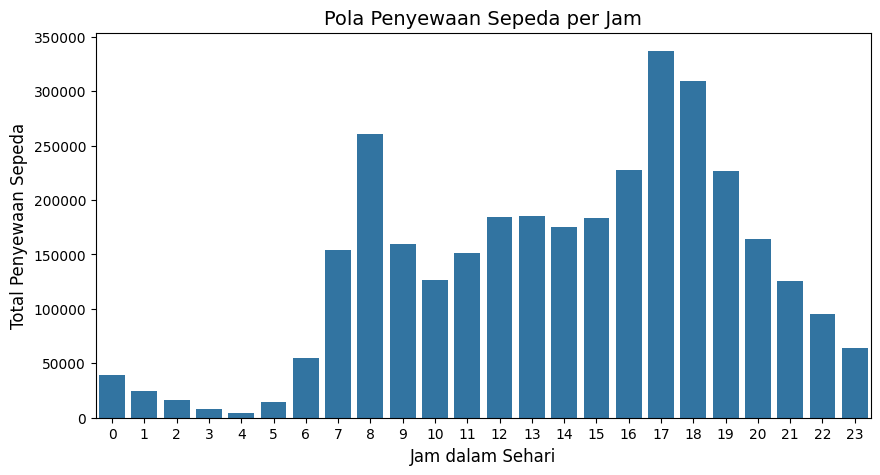

In [20]:
# Urutkan berdasarkan jam agar sesuai urutan waktu
busiest_hours = df_hour.groupby("hr")["cnt"].sum().reset_index()

# Buat plot
plt.figure(figsize=(10, 5))
sns.barplot(data=busiest_hours, x="hr", y="cnt")

# Tambahkan judul dan label
plt.title("Pola Penyewaan Sepeda per Jam", fontsize=14)
plt.xlabel("Jam dalam Sehari", fontsize=12)
plt.ylabel("Total Penyewaan Sepeda", fontsize=12)
plt.xticks(rotation=0)  # Pastikan label jam tetap horizontal

# Tampilkan plot
plt.show()


**Insight:**
- Pertanyaan 1

  Tren penyewaan mengalami kenaikan pada bulan januari sampai agustus. Dan bulan agustus merupakan puncak jumlah penyewaan terbanyak dalam setahun. Pada bulan September sampai Desember penyewaan mengalami penurunan yang signifikan. Jika menganalisis dari segi musim, jumlah penyewaan sepeda terbanyak terjadi Ketika musim gugur (Fall), diikuti musim panas (summer), musim dingin (winter), dan jumlah penyewaan sepeda paling sedikit terjadi Ketika musim semi (spring).
- Pertanyaan 2

  Penyewaan sepeda terbanyak terjadi Ketika cuaca sedang cerah dan berawan serta terjadi di sore hari sekitar jam 17.00. Ini menunjukkan cuaca cerah memiliki pengaruh dalam jumlah penyewaan sepeda.
- Pertanyaan 3

  Penyewaan sepeda dilihat dari per jam, banyak penyewa di pagi hari sekitar jam 8 pagi, dan paling banyak itu di sore hari sekitar jam 5 sore.

## Analisis Lanjutan (Analisis Clustering : Binnning)

In [92]:
print("Analisis Binning berdasarkan waktu dan frekuensi")
# Mendefinisikan binning waktu
bins = [0, 6, 12, 18, 24]  # Binning berdasarkan waktu (malam, pagi, siang, sore)
labels = ['Malam (00-06)', 'Pagi (06-12)', 'Siang (12-18)', 'Sore (18-24)']


# Pengelompokkan ke waktu
df_hour['time_bin'] = pd.cut(df_hour['hr'], bins=bins, labels=labels, right=False)

# Menentukan pengelompokkan berdasarkan frekuensi penyewaan (cnt)
cnt_bins = [df_hour["cnt"].min(), df_hour["cnt"].quantile(0.33),
             df_hour["cnt"].quantile(0.66), df_hour["cnt"].max()]
cnt_labels = ["Rendah", "Sedang", "Tinggi"]

# Pengelompokkan ke jumlah penyewaan
df_hour["rental_bin"] = pd.cut(df_hour["cnt"], bins=cnt_bins, labels=cnt_labels, right=False)

print(df_hour[['hr', 'time_bin', 'cnt', 'rental_bin']].head())

print("\nAnalisis Binning Temperature")
# Mendefinisikan binning temperature
temp_bins = [0, 0.3, 0.6, 1.0]
temp_labels = ["Dingin", "Sedang", "Panas"]

# Pengelompokan temperatur
df_hour["temp_bin"] = pd.cut(df_hour["temp"], bins=temp_bins, labels=temp_labels, right=False)

print(df_hour[['temp', 'temp_bin']].head())

Analisis Binning berdasarkan waktu dan frekuensi
   hr       time_bin  cnt rental_bin
0   0  Malam (00-06)   16     Rendah
1   1  Malam (00-06)   40     Rendah
2   2  Malam (00-06)   32     Rendah
3   3  Malam (00-06)   13     Rendah
4   4  Malam (00-06)    1     Rendah

Analisis Binning Temperature
   temp temp_bin
0  0.24   Dingin
1  0.22   Dingin
2  0.22   Dingin
3  0.24   Dingin
4  0.24   Dingin


Distribusi Penyewaan berdasarkan Waktu Penggunaan


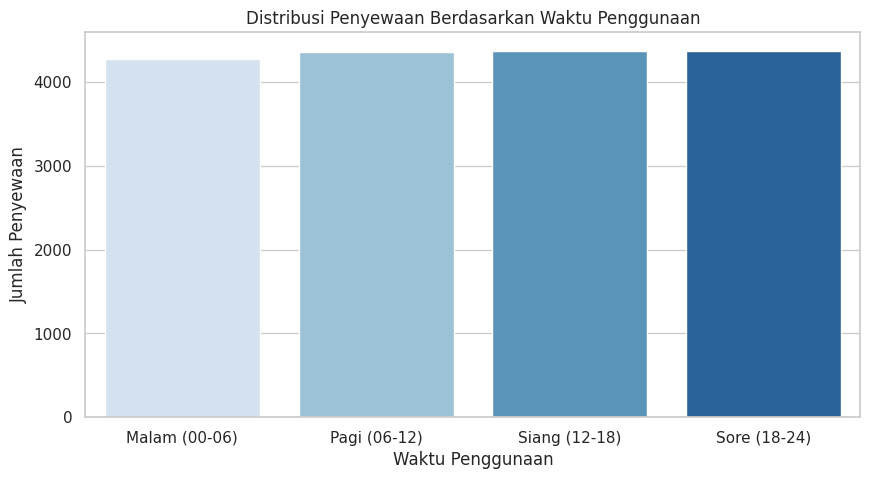

Distribusi Penyewaan berdasarkan Kategori Frekuensi


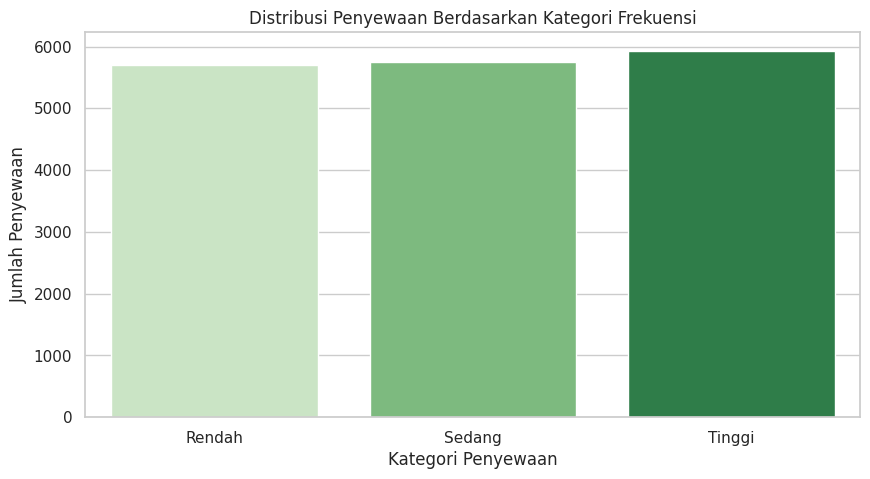

Distribusi Penyewaan berdasarkan Temperatur


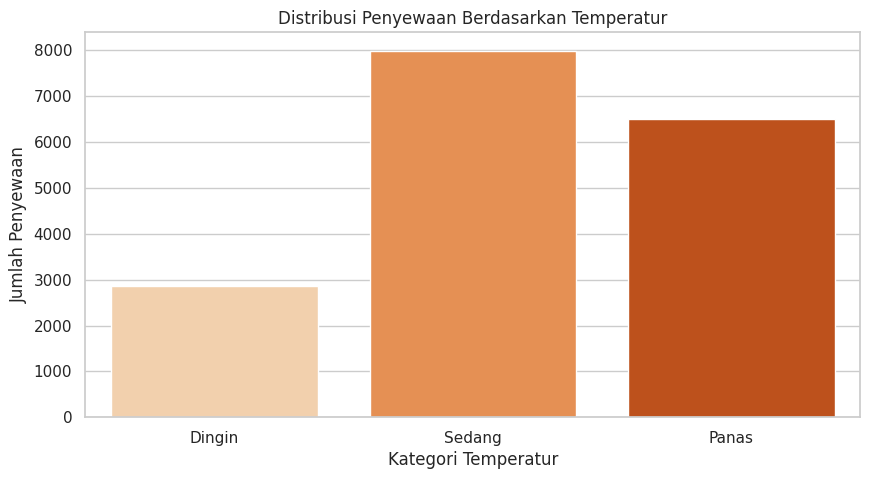

In [94]:
print("Distribusi Penyewaan berdasarkan Waktu Penggunaan")
plt.figure(figsize=(10, 5))
sns.countplot(data=df_hour, x="time_bin", order=['Malam (00-06)', 'Pagi (06-12)', 'Siang (12-18)', 'Sore (18-24)'], hue="time_bin", palette="Blues", legend=False)
plt.title("Distribusi Penyewaan Berdasarkan Waktu Penggunaan")
plt.xlabel("Waktu Penggunaan")
plt.ylabel("Jumlah Penyewaan")
plt.show()

print("Distribusi Penyewaan berdasarkan Kategori Frekuensi")
plt.figure(figsize=(10, 5))
sns.countplot(data=df_hour, x="rental_bin", order=['Rendah', 'Sedang', 'Tinggi'], hue="rental_bin", palette="Greens", legend=False)
plt.title("Distribusi Penyewaan Berdasarkan Kategori Frekuensi")
plt.xlabel("Kategori Penyewaan")
plt.ylabel("Jumlah Penyewaan")
plt.show()

print("Distribusi Penyewaan berdasarkan Temperatur")
plt.figure(figsize=(10, 5))
sns.countplot(data=df_hour, x="temp_bin", hue="temp_bin", order=['Dingin', 'Sedang', 'Panas'], palette="Oranges", legend=False)
plt.title("Distribusi Penyewaan Berdasarkan Temperatur")
plt.xlabel("Kategori Temperatur")
plt.ylabel("Jumlah Penyewaan")
plt.show()


#Insight:
1. Grafik pengelompokan distribusi berdasarkan waktu penggunaan yaitu kategori untuk waktu penggunaan ada malam, pagi, siang, dan sore. Sore hari memiliki jumlah penyewaan tertinggi. Disusul oleh pagi hari dan sore hari yang jumlah penyewaannya cukup tinggi, dan malam hari memiliki penyewaan yang lebih rendah dibandingkan kategori waktu lainnya.

2. Grafik pengelompokkan distribusi penyewaan berdasarkan frekuensi yaitu dikategorikan ada yang rendah, sedang, dan tinggi. Ketiga kategori ini memiliki distribusi yang merata. Artinya tidak ada perbedaan yang mencolok dalam frekuensi peminjaman. Ini menunjukkan bahwa pola penyewaan sepeda cukup stabil dan tidak terlalu ekstrim dalam satu kategori.

3. Grafik pengelompokkan berdasarkan temperatur, yaitu kategori sedang (0.3-0.6) memiliki jumlah penyewaan tertinggi. Ini menunjukkan bahwa orang lebih sering menyewa sepeda pada saat suhu sedang, tidak terlalu panas atau dingin. Penyewaan berkurang ketika suhu dingin (0-0.3). Hal ini masih masuk akal karena ketika dingin banyak orang yang tidak mau bersepeda. Penyewaan pada suhu panas (0.6-1.0) masih tetap tinggi, tetapi masih lebih rendah daripada suhu sedang.

## Conclusion

- Conclution pertanyaan 1

  Tren penyewaan sepeda mengalami kenaikan dari Januari - Agustus, dengan Agustus adalah bulan dengan pelanggan terbanyak. Penyewaan terbanyak terjadi pada musim Gugur dan penyewaan paling sedikit pada musim semi.

- Conclution pertanyaan 2
  
  Cuaca sangat berpengaruh dalam jumlah penyewaan sepeda. Cuaca yang cerah dan berawan adalah kondisi cuaca yang paling banyak pelanggan menyewa sepeda.

- Conclution pertanyaan 3
  Jam paling sibuk dalam sehari terjadi ketika jam 8 pagi dan puncak tersibuk ada pada jam 5 sore.

In [39]:
df_day.to_csv("day_data.csv", index=False)
df_hour.to_csv("hour_data.csv", index=False)